# USDT_event_study

In [11]:
import pandas as pd
import datetime
import ffn
import cufflinks as cf
from utils import USDT_1H

In [12]:
# load data
usdt_1h = pd.read_csv(USDT_1H)
usdt_1h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40059 entries, 0 to 40058
Data columns (total 8 columns):
close         40059 non-null float64
high          40059 non-null float64
low           40059 non-null float64
open          40059 non-null float64
time          40059 non-null object
volumefrom    40059 non-null float64
volumeto      40059 non-null float64
datetime      40059 non-null object
dtypes: float64(6), object(2)
memory usage: 2.4+ MB


In [53]:
# Abnormal Returns(AR) in window period
logrets = ffn.to_log_returns(usdt_1h['close'])  # Use summable log return  
ar = ffn.to_excess_returns(logrets, 0) # Assuming market ret is 0 for simplicity
# Cumulative Abnormal Return(CAR) in window period
news_date = datetime.datetime(2017, 11, 20) # the date news came
window_length = 30 # window period for event study
news_idx = usdt_1h.index[pd.to_datetime(usdt_1h['datetime']) <= news_date][-1]
ar_window = ar[news_idx-window_length:news_idx+window_length] # abnormal return in window period
x_idx = pd.Series(range(-window_length,window_length)).rename("x_idx")
car = ar_window.cumsum().rename("car") # cumulative abnormal return
car = car.reset_index().drop(columns='index')
car = pd.concat([x_idx, car], axis=1)

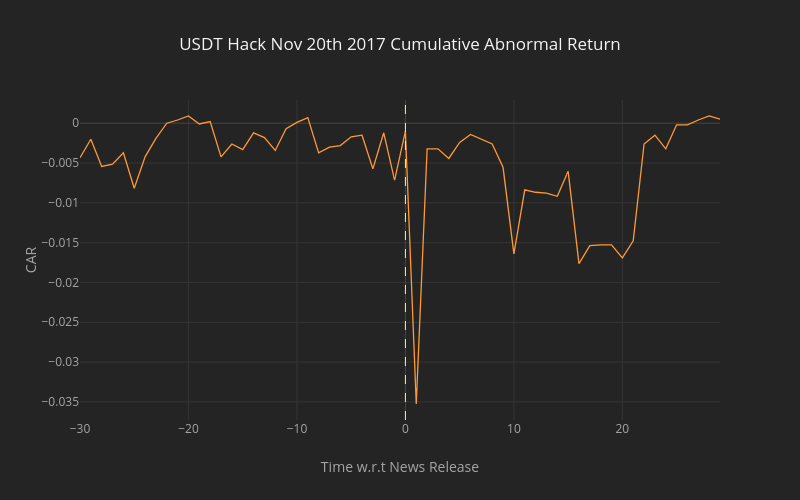

In [64]:
# Display CAR
cf.set_config_file(offline=False, world_readable=True, theme='henanigans')
car.iplot(
    x='x_idx', kind='scatter', xTitle='Time w.r.t News Release', yTitle='CAR', 
    vline={'x':0, 'color':'yellow', 'dash':'dash'},
    title='USDT Hack Nov 20th 2017 Cumulative Abnormal Return', asImage=True)